<a href="https://colab.research.google.com/github/James-Hagerman/BW_1/blob/master/Unit_1_Bulid_James_Hagerman.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

# Loading in my first dataset
df = pd.read_csv('https://query.data.world/s/rwyfk4jocq7f4jwxgsrhiknycwmvoa')

In [ ]:
import plotly
print(plotly.__version__)

4.5.0


In [ ]:
# Installing updated version of plotly
!pip install plotly==4.5

#Cleaning Data

In [ ]:
# Displaying top 5 rows of data
df.head()

,Unnamed: 0,year,month,intent,police,sex,age,race,hispanic,place,education
0,1,2012,1,Suicide,0,M,34.0,Asian/Pacific Islander,100,Home,BA+
1,2,2012,1,Suicide,0,F,21.0,White,100,Street,Some college
2,3,2012,1,Suicide,0,M,60.0,White,100,Other specified,BA+
3,4,2012,2,Suicide,0,M,64.0,White,100,Home,BA+
4,5,2012,2,Suicide,0,M,31.0,White,100,Other specified,HS/GED


In [ ]:
# Displaying bottom five rows of data
df.tail()

,Unnamed: 0,year,month,intent,police,sex,age,race,hispanic,place,education
100793,100794,2014,12,Homicide,0,M,36.0,Black,100,Home,HS/GED
100794,100795,2014,12,Homicide,0,M,19.0,Black,100,Street,HS/GED
100795,100796,2014,12,Homicide,0,M,20.0,Black,100,Street,HS/GED
100796,100797,2014,12,Homicide,0,M,22.0,Hispanic,260,Street,Less than HS
100797,100798,2014,10,Homicide,0,M,43.0,Black,100,Other unspecified,HS/GED


In [ ]:
# Displaying how many rows and columns are in dataframe
df.shape

(100798, 11)

In [ ]:
# Displaying the types of data of each column
df.dtypes

Unnamed: 0      int64
year            int64
month           int64
intent         object
police          int64
sex            object
age           float64
race           object
hispanic        int64
place          object
education      object
dtype: object

In [ ]:
# Dropping the Unnamed: 0 column
df = df.drop(['Unnamed: 0'], axis = 1)

In [ ]:
# Displaying top 2 rows to check that Unnamed: 0 successfully dropped
df.head(2)

,year,month,intent,police,sex,age,race,hispanic,place,education
0,2012,1,Suicide,0,M,34.0,Asian/Pacific Islander,100,Home,BA+
1,2012,1,Suicide,0,F,21.0,White,100,Street,Some college


In [ ]:
# Checking for null values
df.isnull().sum()

year            0
month           0
intent          1
police          0
sex             0
age            18
race            0
hispanic        0
place        1384
education    1422
dtype: int64

In [ ]:
# Dropping all null values from dataframe
df.dropna(inplace = True)

In [ ]:
# Checking to make sure nulls were dropped
df.isnull().sum()

year         0
month        0
intent       0
police       0
sex          0
age          0
race         0
hispanic     0
place        0
education    0
dtype: int64

In [ ]:
# Filtering dataframe to only include rows where the intent was suicide
df = df[df.intent == 'Suicide']

#Exploring Data

##Year

In [ ]:
# Displaying unique values in the year column and how many there were 
df['year'].value_counts()

2014    21039
2013    20892
2012    20360
Name: year, dtype: int64

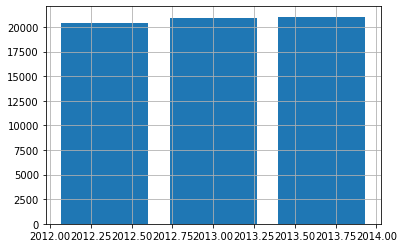

In [ ]:
# Histogram of year column to check for trends
df['year'].hist(bins = 3, rwidth = .8)

##Month

In [ ]:
# Displaying unique values in the month column and how many there were 
df['month'].value_counts()

7     5443
5     5421
4     5352
8     5341
6     5292
9     5276
3     5256
10    5174
1     5155
11    5022
12    4906
2     4653
Name: month, dtype: int64

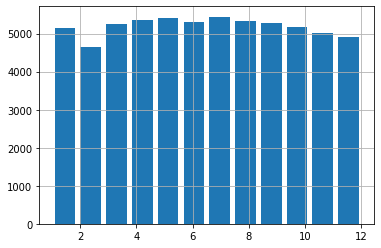

In [ ]:
# Histogram for the month column to check for trends
df['month'].hist(bins = 12, rwidth = .8)

##Police

In [ ]:
# Displaying unique values in the police column and how many there were 
# I did this to check for suicide by cop instances
df['police'].value_counts()

0    62291
Name: police, dtype: int64

##Intent

In [ ]:
# Displaying unique values in the year police column and how many there were 
# I did this to make sure I had only suicide instances
df['intent'].value_counts()

Suicide    62291
Name: intent, dtype: int64

##Sex

In [ ]:
# Displaying unique values in the sex column and how many there were 
df['sex'].value_counts()

M    53712
F     8579
Name: sex, dtype: int64

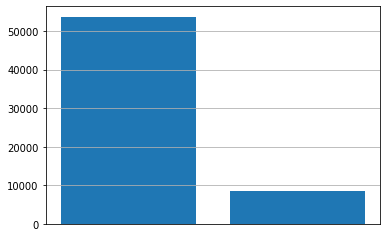

In [ ]:
# Histogram for the sex column to check for trends
df['sex'].hist(bins = 2, rwidth = .8)
plt.show()

##Age

In [ ]:
# Displaying unique values in the age column and how many there were 
df['age'].value_counts()

54.0     1369
53.0     1363
51.0     1323
52.0     1317
56.0     1316
         ... 
99.0        5
10.0        3
102.0       2
101.0       2
9.0         2
Name: age, Length: 93, dtype: int64

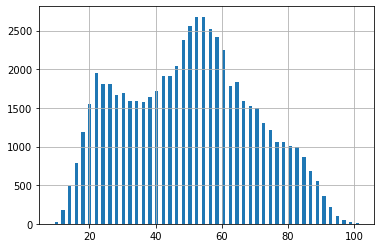

In [ ]:
# Histogram of the age column to check for trends
df['age'].hist(bins = 46, rwidth = .5)

###Filtering ages to 18-25


In [ ]:
# Creates a new dataframe with ages betweeen 18 and 25
# I did this to compare other variables to the age to see if they had 
# Different affects based on age 
dfage18_25 = df[df['age'].isin(['18.0','19.0', '20.0', '21.0','22.0', '23.0', '24.0', '25.0'])]

In [ ]:
# Displays top 5 rows of the 18-25 dataframe
dfage18_25.head()

,year,month,intent,police,sex,age,race,hispanic,place,education
1,2012,1,Suicide,0,F,21.0,White,100,Street,Some college
11,2012,1,Suicide,0,M,21.0,Native American/Native Alaskan,100,Home,HS/GED
23,2012,4,Suicide,0,M,19.0,White,100,Home,Some college
26,2012,4,Suicide,0,M,22.0,Native American/Native Alaskan,100,Other specified,HS/GED
27,2012,4,Suicide,0,M,21.0,White,100,Other specified,HS/GED


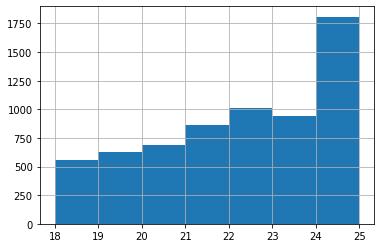

In [ ]:
# Histogram of ages 18-25 dataframe to get a closer look
dfage18_25['age'].hist(bins = 7)

####Education

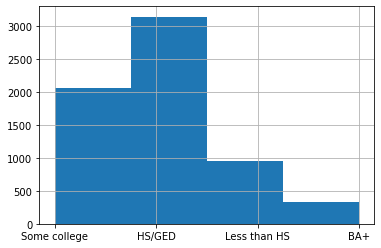

In [ ]:
# Histogram of the education column in the ages 18-25 dataframe 
# Did this to compare to education among the 50-60 age range 
dfage18_25['education'].hist(bins = 4)

In [ ]:
# Creates a crosstab of age and education in the 18-25 dataframe 
# I did this to run a chi2 test on the columns to check for dependency
contingency3 = pd.crosstab(dfage18_25['education'], dfage18_25['age'], margins = True)

contingency3

age,18.0,19.0,20.0,21.0,22.0,23.0,24.0,25.0,All
education,,,,,,,,,
BA+,0,0,1,16,44,75,106,94,336
HS/GED,277,339,345,419,461,466,438,401,3146
Less than HS,212,115,100,105,130,101,99,96,958
Some college,67,176,240,320,375,304,289,286,2057
All,556,630,686,860,1010,946,932,877,6497


In [ ]:
# Prints the Chi2 value, P-value, and Degrees of Freedom of contignecy3
# Checks for dependency
chi2, p_value, dof, expected = stats.chi2_contingency(contingency3)

print("chi2:", chi2)
print("p value:", p_value)
print("dof:", dof)


chi2: 596.3265376091445
p value: 3.4039779534464875e-105
dof: 32


Due to a chi2 statistic of 596.3 and a p-value of 3.4e-105 we **reject** the null hypothesis that age and education among 18-25 year olds are independent. 

####Race

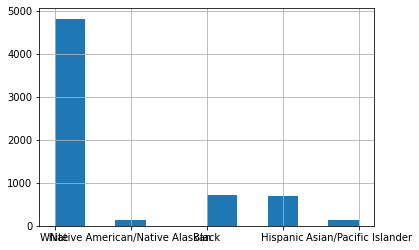

In [ ]:
# Histogram of race in the 18-25 ages dataframe
dfage18_25['race'].hist()

###Filtering ages to 50-60

In [ ]:
# Creates a new dataframe of suicides between the ages of 50 and 60
dfage50_60 = df[df['age'].isin(['50.0','51.0', '52.0', '53.0','54.0', '55.0', '56.0', '57.0', '58.0', '59.0', '60.0'])]

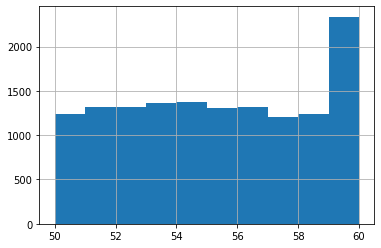

In [ ]:
# Histogram of suicides between ages 50 and 60
dfage50_60['age'].hist(bins = 10)

####Education

In [ ]:
# Creates a crosstab of education and ages between 50-60 
# Created this to run a chi2 test to check for dependency
contingency4 = pd.crosstab(dfage50_60['education'], dfage50_60['age'], margins = True)

contingency4

age,50.0,51.0,52.0,53.0,54.0,55.0,56.0,57.0,58.0,59.0,60.0,All
education,,,,,,,,,,,,
BA+,239,253,242,249,239,229,246,252,264,272,289,2774
HS/GED,570,600,624,655,655,610,596,526,556,460,444,6296
Less than HS,137,159,163,134,143,144,126,125,112,125,94,1462
Some college,289,311,288,325,332,321,348,302,311,316,336,3479
All,1235,1323,1317,1363,1369,1304,1316,1205,1243,1173,1163,14011


In [ ]:
# Displays the Chi2 statistic, P-value, and Degrees of Freedom of contingency4 
# Checks for dependency
chi2, p_value, dof, expected = stats.chi2_contingency(contingency4)

print("chi2:", chi2)
print("p value:", p_value)
print("dof:", dof)


chi2: 102.27860760115999
p value: 1.5367656195407113e-06
dof: 44


Due to a Chi2 statistic of 102.2 and a P-value of 1.54e-6 we **reject** the null hypothesis that age and education among 50 to 60 year olds are independent. 

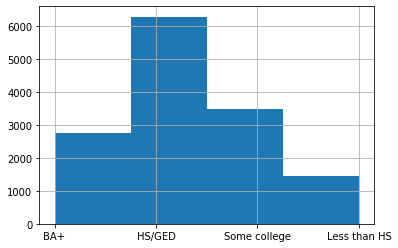

In [ ]:
# Histogram displayinhg education among suicides between ages 50 and 60 
dfage50_60['education'].hist(bins = 4)

####Race

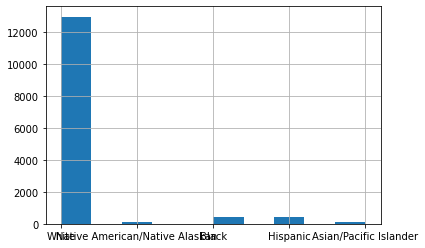

In [ ]:
# Histogram of races of suicides in ages 50 to 60 
dfage50_60['race'].hist()

##Race

In [ ]:
# Displaying unique values in the race column and how many there were
df['race'].value_counts()

White                             54615
Black                              3285
Hispanic                           3120
Asian/Pacific Islander              724
Native American/Native Alaskan      547
Name: race, dtype: int64

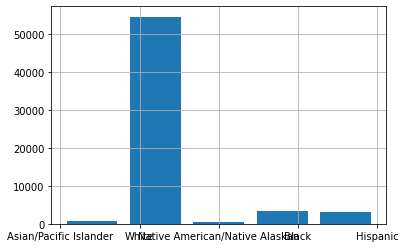

In [ ]:
# Histogram of the races of suicides 
df['race'].hist(bins = 5, rwidth = .8)

##Education

In [ ]:
# Displaying unique values in the education column and how many there were
df['education'].value_counts()

HS/GED          26321
Some college    15532
BA+             11147
Less than HS     9291
Name: education, dtype: int64

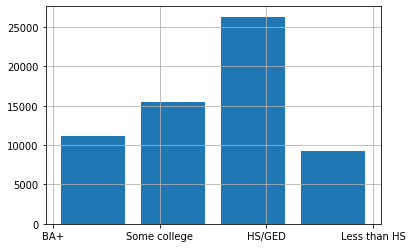

In [ ]:
# Histogram of the education level of suicides
df['education'].hist(bins = 4, rwidth = .8)

In [ ]:
# Checking the shape and head of our dataframe
print(df.shape)
df.head()

(62291, 10)


,year,month,intent,police,sex,age,race,hispanic,place,education
0,2012,1,Suicide,0,M,34.0,Asian/Pacific Islander,100,Home,BA+
1,2012,1,Suicide,0,F,21.0,White,100,Street,Some college
2,2012,1,Suicide,0,M,60.0,White,100,Other specified,BA+
3,2012,2,Suicide,0,M,64.0,White,100,Home,BA+
4,2012,2,Suicide,0,M,31.0,White,100,Other specified,HS/GED


#Dependency 

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



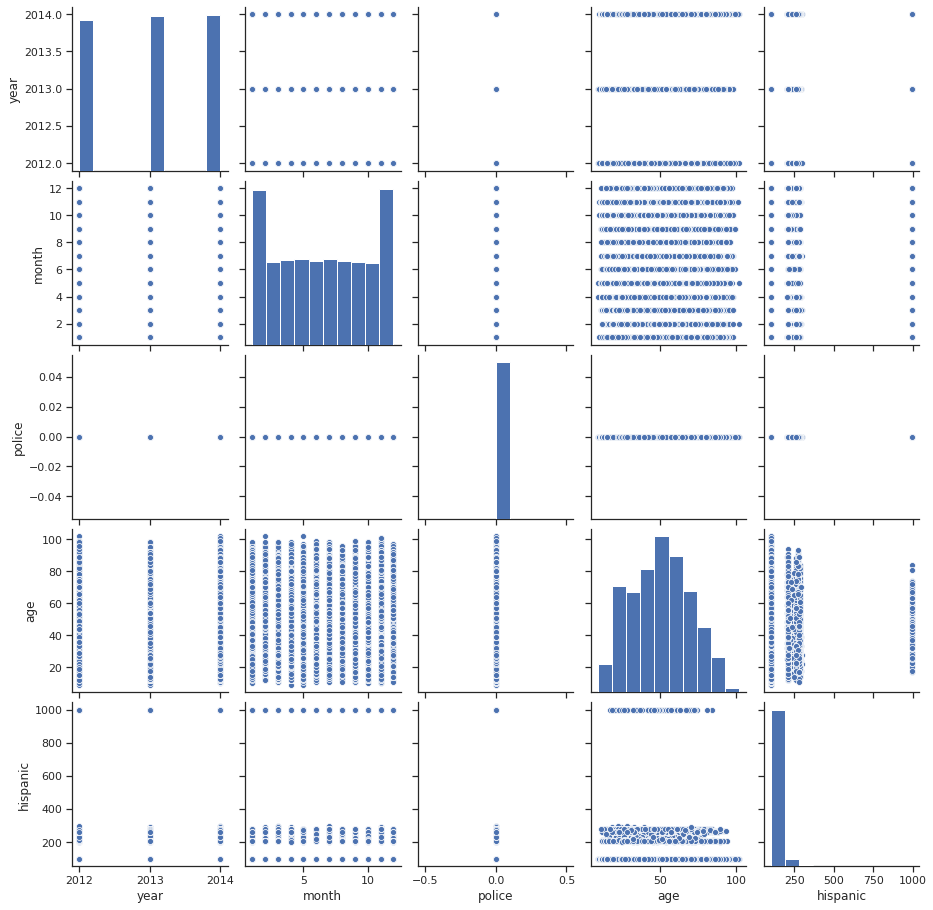

In [ ]:
# Displays a plot matrix of a dataframe columns
# Used to check for visual trends among data
import seaborn as sns
sns.set(style="ticks")
sns.pairplot(df)

In [ ]:
from scipy import stats

##Age and Sex

In [ ]:
# Creates a crosstab of sex and age to run a Chi2 test 
contingency = pd.crosstab(df['sex'], df['age'], margins = True)

contingency

age,9.0,10.0,11.0,12.0,13.0,14.0,15.0,16.0,17.0,18.0,19.0,20.0,21.0,22.0,23.0,24.0,25.0,26.0,27.0,28.0,29.0,30.0,31.0,32.0,33.0,34.0,35.0,36.0,37.0,38.0,39.0,40.0,41.0,42.0,43.0,44.0,45.0,46.0,47.0,48.0,...,63.0,64.0,65.0,66.0,67.0,68.0,69.0,70.0,71.0,72.0,73.0,74.0,75.0,76.0,77.0,78.0,79.0,80.0,81.0,82.0,83.0,84.0,85.0,86.0,87.0,88.0,89.0,90.0,91.0,92.0,93.0,94.0,95.0,96.0,97.0,98.0,99.0,101.0,102.0,All
sex,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
F,0,0,4,9,24,37,40,49,51,58,69,74,93,112,103,126,108,97,125,120,121,128,141,121,116,121,129,119,116,135,126,159,178,142,177,160,163,175,203,237,...,113,139,114,112,83,92,112,70,77,59,47,42,53,40,37,36,37,35,35,30,35,21,20,18,19,11,15,4,9,6,6,3,2,2,0,2,0,1,0,8579
M,2,3,10,45,102,179,234,305,379,498,561,612,767,898,843,806,769,832,759,702,719,697,724,695,658,666,670,640,700,693,683,661,716,776,820,809,779,819,842,943,...,776,809,771,725,665,652,666,725,626,593,608,557,563,482,496,495,488,452,481,459,468,425,396,371,278,311,212,186,158,113,94,56,46,33,18,14,5,1,2,53712
All,2,3,14,54,126,216,274,354,430,556,630,686,860,1010,946,932,877,929,884,822,840,825,865,816,774,787,799,759,816,828,809,820,894,918,997,969,942,994,1045,1180,...,889,948,885,837,748,744,778,795,703,652,655,599,616,522,533,531,525,487,516,489,503,446,416,389,297,322,227,190,167,119,100,59,48,35,18,16,5,2,2,62291


In [ ]:
# Displays Chi2 statistic, P-value, and Degrees of Freedom 
chi2, p_value, dof, expected = stats.chi2_contingency(contingency)

print("chi2:", chi2)
print("p value:", p_value)
print("dof:", dof)


chi2: 852.4084726780283
p value: 6.873406510697994e-86
dof: 186


Due to a Chi2 statistic of 852 and a p-value of 6.87e-86 we **reject** the null hypothesis that age and sex are independent. 

##Sex and Education

In [ ]:
# Creates a crosstab of sex and education to run a chi2 test
contingency1 = pd.crosstab(df['sex'], df['education'], margins = True)

contingency1

education,BA+,HS/GED,Less than HS,Some college,All
sex,,,,,
F,1726,3365,971,2517,8579
M,9421,22956,8320,13015,53712
All,11147,26321,9291,15532,62291


In [ ]:
# Displays Chi2 statistic, P-value, and Degrees of Freedom 
chi2, p_value, dof, expected = stats.chi2_contingency(contingency1)

print("chi2:", chi2)
print("p value:", p_value)
print("dof:", dof)


chi2: 212.8494256806932
p value: 1.246262180153468e-41
dof: 8


Due to a Chi2 statistic of 212 and a p-value of 1.25e-41 we **reject** the null hypothesis that sex and education are independent.

In [ ]:
# Creates a crosstab of sex and race to run a Chi2 test
contingency2 = pd.crosstab(df['sex'], df['race'], margins = True)

contingency2

race,Asian/Pacific Islander,Black,Hispanic,Native American/Native Alaskan,White,All
sex,,,,,,
F,96,359,345,62,7717,8579
M,628,2926,2775,485,46898,53712
All,724,3285,3120,547,54615,62291


In [ ]:
# Displays Chi2 statistic, P-value, and Degrees of Freedom 
chi2, p_value, dof, expected = stats.chi2_contingency(contingency2)

print("chi2:", chi2)
print("p value:", p_value)
print("dof:", dof)

chi2: 50.50706602584275
p value: 2.1529425356613283e-07
dof: 10


Due to a Chi2 statistic of 50 and a p-value of 2.15e-07 we **reject** the null hypothesis that sex and education are independent.

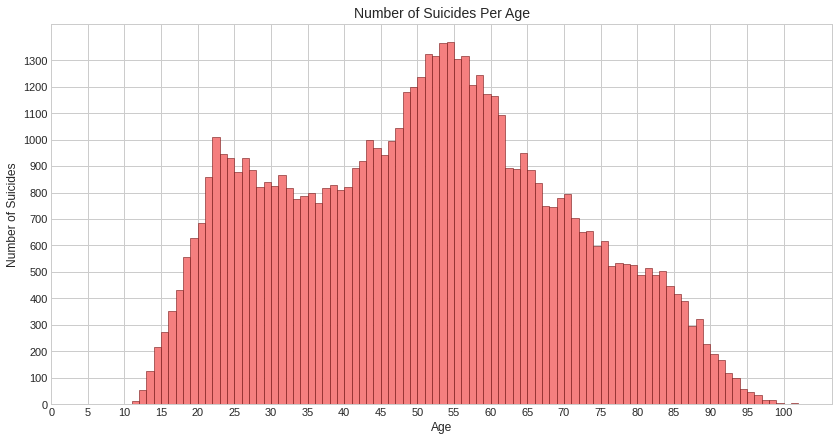

In [ ]:
# Plots our age column as a histogram
# Makes our figure 14x7 inches
plt.figure(figsize=(14,7)) 

# Selects the 'seaborn-whitegrid' style
plt.style.use('seaborn-whitegrid') 

# Assigns our dataframe to varialbe x
x = df['age']

# Plots x in 93 bins, selects the color of bars and the edgecolor of bars
# Decides our line width
plt.hist(x, bins=93, facecolor = '#f57f7f', edgecolor='#630000', linewidth=0.5)

# Titles the Histogram and selects fontsize
plt.title('Number of Suicides Per Age', fontsize = 14) 

# Creates X and Y axis labels
plt.xlabel('Age') 
plt.ylabel('Number of Suicides')

# Decides how far apart we want our x and y axis tick marks
plt.xticks(range(0,105,5))
plt.yticks(range(0,1400,100))


plt.show()

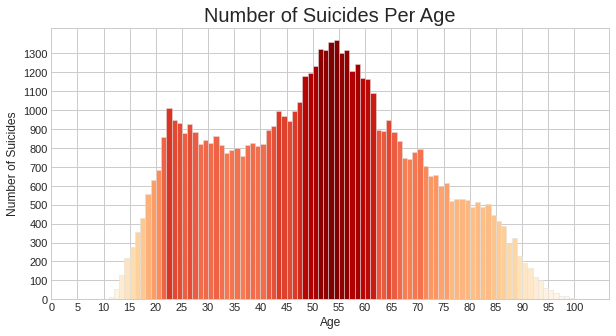

In [ ]:
# Plots age column as a histgram 
# Makes our figure 10x5 inches
plt.figure(figsize=(10,5)) 

# Selects the histogram stlye 'seaborn-whitegrid'
plt.style.use('seaborn-whitegrid') 

# Assigns n, bins, and pathces to our histgram plot
# Histogram plots our x variable in 93 bins with selected face and edgecolors
n, bins, patches = plt.hist(x, bins=93, facecolor='#2ab0ff', edgecolor='#e0e0e0', linewidth=0.5)

# Turns n into integer data
n = n.astype('int') 

# This applies our colormap to our histgrom to show the difference in ages better
for i in range(len(patches)):
    patches[i].set_facecolor(plt.cm.OrRd(n[i]/max(n)))

# Adds our title with a fontsize of 20
plt.title('Number of Suicides Per Age', fontsize = 20) 

# Plots our x and y axis labels
plt.xlabel('Age') 
plt.ylabel('Number of Suicides')

# Decides the range of our x and y ticks 
# And decides what number to count by 
plt.xticks(range(0,105,5))
plt.yticks(range(0,1400,100))


plt.show()

In [ ]:
# Displays the mean age of suicides
df['age'].mean()

50.20792730892103

In [ ]:
# Displays the standard deviation of ages away from our mean
df['age'].std()

19.221887493938446

#Mental Illness Data


In [ ]:
# Serious thoughts of suicide in the past year. 

# Imports plotly express and plotly io 
import plotly.express as px 
import plotly.io as pio

# Reads in data on suicidal thoughts 
MI = pd.read_csv('https://raw.githubusercontent.com/James-Hagerman/BW_1/master/suiciderate.csv')
MI.head()

,Order,State,18 or Older Estimate,18 or Older 95% CI (Lower),18 or Older 95% CI (Upper),18-25 Estimate,18-25 95% CI (Lower),18-25 95% CI (Upper),26 or Older Estimate,26 or Older 95% CI (Lower),26 or Older 95% CI (Upper)
0,1,Total U.S.,3.89%,3.70%,4.09%,7.33%,7.02%,7.65%,3.30%,3.09%,3.52%
1,2,Northeast,3.84%,3.54%,4.17%,7.31%,6.77%,7.89%,3.26%,2.92%,3.64%
2,3,Midwest,3.98%,3.72%,4.27%,7.68%,7.24%,8.15%,3.36%,3.06%,3.68%
3,4,South,3.81%,3.55%,4.09%,6.78%,6.36%,7.23%,3.30%,3.01%,3.63%
4,5,West,3.97%,3.64%,4.32%,7.88%,7.23%,8.59%,3.27%,2.91%,3.67%


In [ ]:
# Removes the 95% CI columns from our dataframe
MIS = MI[['State', '18 or Older Estimate', '18-25 Estimate', '26 or Older Estimate']]

MIS.head()

,State,18 or Older Estimate,18-25 Estimate,26 or Older Estimate
0,Total U.S.,3.89%,7.33%,3.30%
1,Northeast,3.84%,7.31%,3.26%
2,Midwest,3.98%,7.68%,3.36%
3,South,3.81%,6.78%,3.30%
4,West,3.97%,7.88%,3.27%


In [ ]:
# Displays the datatypes of our dataframe
MIS.dtypes

State                   object
18 or Older Estimate    object
18-25 Estimate          object
26 or Older Estimate    object
dtype: object

In [ ]:
# Function to remove the % symbol and turn data into floats
def remove_percent(cell):
  return float(cell.strip().strip('%'))


In [ ]:
# Applies our function to our dataframe columns that need it 
MIS['18 or Older Estimate'] = MIS['18 or Older Estimate'].apply(remove_percent)
MIS['18-25 Estimate'] = MIS['18-25 Estimate'].apply(remove_percent)
MIS['26 or Older Estimate'] = MIS['26 or Older Estimate'].apply(remove_percent)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/st

In [ ]:
# Displays the first 6 rows to confirm our function worked
MIS.head(6)

,State,18 or Older Estimate,18-25 Estimate,26 or Older Estimate
0,Total U.S.,3.89,7.33,3.30
1,Northeast,3.84,7.31,3.26
2,Midwest,3.98,7.68,3.36
3,South,3.81,6.78,3.30
4,West,3.97,7.88,3.27
5,Alabama,3.51,6.70,2.96


In [ ]:
# Dropping the first 5 rows 
MIS = MIS.drop(MIS.index[0:5])

In [ ]:
# Importing json for our choropleth
import json

In [ ]:
# Imports request to get our json file
import requests

US_states = requests.get('https://raw.githubusercontent.com/PublicaMundi/MappingAPI/master/data/geojson/us-states.json')

# Assigns our json file to a variable 
US_states = US_states.json()

In [ ]:
# Another way to import our json file 
from urllib.request import urlopen
import json
with urlopen('https://raw.githubusercontent.com/PublicaMundi/MappingAPI/master/data/geojson/us-states.json') as response:
    US_states = json.load(response)
US_states["features"][0]

{'geometry': {'coordinates': [[[-87.359296, 35.00118],
    [-85.606675, 34.984749],
    [-85.431413, 34.124869],
    [-85.184951, 32.859696],
    [-85.069935, 32.580372],
    [-84.960397, 32.421541],
    [-85.004212, 32.322956],
    [-84.889196, 32.262709],
    [-85.058981, 32.13674],
    [-85.053504, 32.01077],
    [-85.141136, 31.840985],
    [-85.042551, 31.539753],
    [-85.113751, 31.27686],
    [-85.004212, 31.003013],
    [-85.497137, 30.997536],
    [-87.600282, 30.997536],
    [-87.633143, 30.86609],
    [-87.408589, 30.674397],
    [-87.446927, 30.510088],
    [-87.37025, 30.427934],
    [-87.518128, 30.280057],
    [-87.655051, 30.247195],
    [-87.90699, 30.411504],
    [-87.934375, 30.657966],
    [-88.011052, 30.685351],
    [-88.10416, 30.499135],
    [-88.137022, 30.318396],
    [-88.394438, 30.367688],
    [-88.471115, 31.895754],
    [-88.241084, 33.796253],
    [-88.098683, 34.891641],
    [-88.202745, 34.995703],
    [-87.359296, 35.00118]]],
  'type': 'Polygon'},
 

In [ ]:
# Checking the features of our json file
US_states['features'][0]

{'geometry': {'coordinates': [[[-87.359296, 35.00118],
    [-85.606675, 34.984749],
    [-85.431413, 34.124869],
    [-85.184951, 32.859696],
    [-85.069935, 32.580372],
    [-84.960397, 32.421541],
    [-85.004212, 32.322956],
    [-84.889196, 32.262709],
    [-85.058981, 32.13674],
    [-85.053504, 32.01077],
    [-85.141136, 31.840985],
    [-85.042551, 31.539753],
    [-85.113751, 31.27686],
    [-85.004212, 31.003013],
    [-85.497137, 30.997536],
    [-87.600282, 30.997536],
    [-87.633143, 30.86609],
    [-87.408589, 30.674397],
    [-87.446927, 30.510088],
    [-87.37025, 30.427934],
    [-87.518128, 30.280057],
    [-87.655051, 30.247195],
    [-87.90699, 30.411504],
    [-87.934375, 30.657966],
    [-88.011052, 30.685351],
    [-88.10416, 30.499135],
    [-88.137022, 30.318396],
    [-88.394438, 30.367688],
    [-88.471115, 31.895754],
    [-88.241084, 33.796253],
    [-88.098683, 34.891641],
    [-88.202745, 34.995703],
    [-87.359296, 35.00118]]],
  'type': 'Polygon'},
 

In [ ]:
# Assigning a dictionary of unique values 
# This allows us to plot our data on our map
state_name_map = {}
for feature in US_states['features']:
  feature['id'] = feature['properties']['name']
  state_name_map[feature['properties']['name']] = feature['id']

In [ ]:
state_name_map

{'Alabama': 'Alabama',
 'Alaska': 'Alaska',
 'Arizona': 'Arizona',
 'Arkansas': 'Arkansas',
 'California': 'California',
 'Colorado': 'Colorado',
 'Connecticut': 'Connecticut',
 'Delaware': 'Delaware',
 'District of Columbia': 'District of Columbia',
 'Florida': 'Florida',
 'Georgia': 'Georgia',
 'Hawaii': 'Hawaii',
 'Idaho': 'Idaho',
 'Illinois': 'Illinois',
 'Indiana': 'Indiana',
 'Iowa': 'Iowa',
 'Kansas': 'Kansas',
 'Kentucky': 'Kentucky',
 'Louisiana': 'Louisiana',
 'Maine': 'Maine',
 'Maryland': 'Maryland',
 'Massachusetts': 'Massachusetts',
 'Michigan': 'Michigan',
 'Minnesota': 'Minnesota',
 'Mississippi': 'Mississippi',
 'Missouri': 'Missouri',
 'Montana': 'Montana',
 'Nebraska': 'Nebraska',
 'Nevada': 'Nevada',
 'New Hampshire': 'New Hampshire',
 'New Jersey': 'New Jersey',
 'New Mexico': 'New Mexico',
 'New York': 'New York',
 'North Carolina': 'North Carolina',
 'North Dakota': 'North Dakota',
 'Ohio': 'Ohio',
 'Oklahoma': 'Oklahoma',
 'Oregon': 'Oregon',
 'Pennsylvania': '

In [ ]:
US_states['features'][0]['properties']

{'density': 94.65, 'name': 'Alabama'}

In [ ]:
# Applying our dictionary to a column in our dataframe
MIS['id'] = MIS['State'].apply(lambda x: state_name_map[x])

In [ ]:
# Checking the head of our dataframe
MIS.head()

,State,18 or Older Estimate,18-25 Estimate,26 or Older Estimate,id
5,Alabama,3.51,6.70,2.96,Alabama
6,Alaska,4.21,7.68,3.56,Alaska
7,Arizona,4.04,7.70,3.40,Arizona
8,Arkansas,4.59,6.82,4.21,Arkansas
9,California,3.79,7.94,3.02,California


In [ ]:
# Plots our json file and our dataframe as a choropleth 
fig = px.choropleth(MIS, geojson = US_states, locations = 'id', color = '18-25 Estimate')
fig.show()

In [ ]:
# Different choropleth map displaying the age range of 18 and 25 
fig = px.choropleth(MIS, geojson=US_states, locations='State', color='18-25 Estimate',
                           color_continuous_scale="OrRd",
                           range_color=(2, 10),
                           scope="usa", 
                           title = 'Percent of People Between 18 and 25 that had Suicidal Thoughts in 2013'
                           
                          )
fig.update_layout(margin={"r":0,"t":25,"l":0,"b":0}, title_x = .45, legend=dict(
    yanchor="top",
    y=0.99,
    xanchor="left",
    x=0.01
))
fig.show()

In [ ]:
# Choropleth map displaying the age rnage of 18 or older
fig1 = px.choropleth(MIS, geojson=US_states, locations='State', color='18 or Older Estimate',
                           color_continuous_scale="OrRd",
                           range_color=(2, 10),
                           scope="usa", 
                           title = 'Percent of People that had Suicidal Thoughts in 2012-2013'
                          )
fig1.update_layout(margin={"r":0,"t":25,"l":0,"b":0}, title_x = .45)
fig1.show()

In [ ]:
# different choropleth map displaying the age range of 26 and older 
fig1 = px.choropleth(MIS, geojson=US_states, locations='State', color='26 or Older Estimate',
                           color_continuous_scale="OrRd",
                           range_color=(2, 10),
                           scope="usa", 
                           title = 'Percent of People 26 or Older that had Suicidal Thoughts in 2013'
                          )
fig1.update_layout(margin={"r":0,"t":25,"l":0,"b":0}, title_x = .45)
fig1.show()

In [ ]:
# Estimated mean percentage of suicidal thoughts from 18-25 year olds
MIS['18-25 Estimate'].mean()

7.461764705882352

In [ ]:
# Estimated mean percentage of suicidal thoughts from ages 26 and above
MIS['26 or Older Estimate'].mean()

3.4394117647058833